# Gráficos 3D de Time varying IRF's

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

C:\Users\gabri\AppData\Local\Temp\ipykernel_10352\2431472145.py:38: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


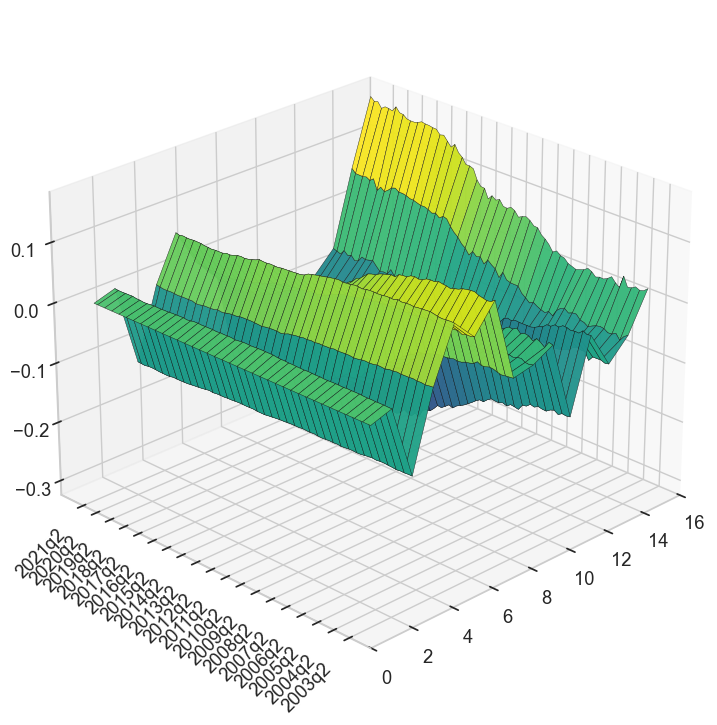

In [49]:
# === Cargar los datos ===
# Asegúrate de tener los datos en formato CSV con columnas:
# 'Periods', '2003q2', '2003q3', ..., '2021q3'
# C:\Users\gabri\OneDrive\Desktop\Cato\Tesis\Tesis-paper\Data y gráficos\IRF TV data.xlsx
# Estilo elegante
sns.set(style="whitegrid", context="notebook", font_scale=1.2)

df = pd.read_excel("C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/IRF TV data.xlsx")  # cambia por la ruta real


# === Preprocesamiento ===
horizontes = df['Periods'].values                # eje X: horizonte (0, 1, 2, ...)
tiempos = df.columns[1:]                         # eje Y: tiempo (2003q2, ..., 2021q3)
Z = df.iloc[:, 1:].values                        # eje Z: valores IRF

# Crear la malla (meshgrid) para X (horizonte) y Y (tiempo)
X, Y = np.meshgrid(horizontes, range(len(tiempos)))  # len(tiempos) es el número de trimestres

# === Gráfico 3D ===
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')

# Superficie
surf = ax.plot_surface(X, Y, Z.T, cmap=cm.viridis, edgecolor='k', linewidth=0.3, alpha=0.95)

# Etiquetas limpias y elegantes
# ax.set_xlabel('Horizonte (trimestres)', labelpad=15)
# ax.set_ylabel('Fecha', labelpad=15)
# ax.set_zlabel('Respuesta IRF', labelpad=15)
# ax.set_title('Función de Impulso-Respuesta con Coeficientes Variables en el Tiempo', pad=20)

# Eje Y con fechas cada 4 trimestres
ax.set_yticks(np.arange(0, len(tiempos), 4))
ax.set_yticklabels(tiempos[::4], rotation=45, ha='right')

# Ajustes estéticos
ax.view_init(elev=25, azim=225)  # Ángulo de cámara
plt.tight_layout()
plt.show()

# FEVD

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Gráfico modelo con findex

In [56]:
df = pd.read_excel("C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/FEVD data findex.xlsx")

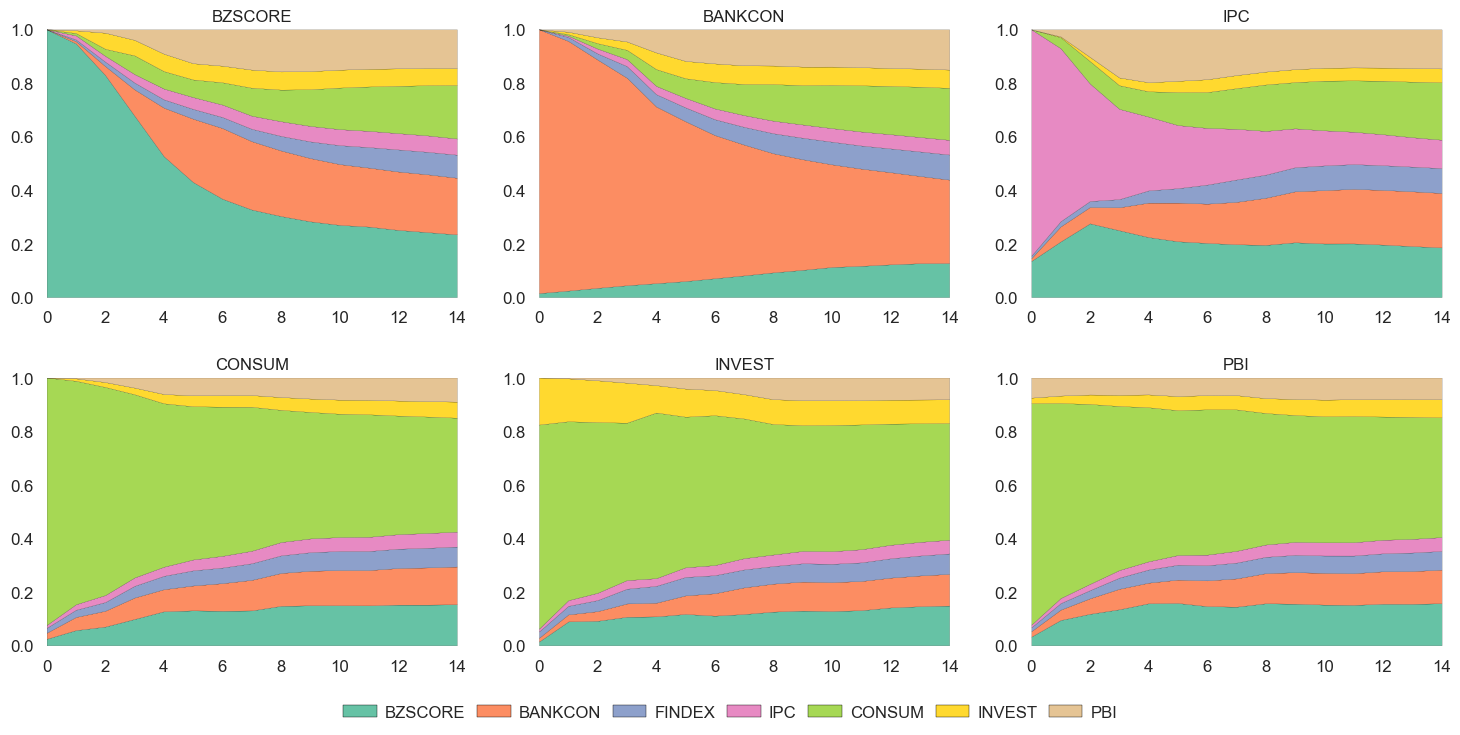

In [57]:
# Preparación de columnas y datos
df.columns = ['Variable_FEVD', 'Variable_Explicativa'] + list(range(15))
variables_objetivo = df['Variable_FEVD'].unique()
colores = sns.color_palette("Set2", n_colors=8) + [(1.0, 0.6, 0.6)]  # 9 colores

# Estilo general
sns.set(style="white", context="notebook", font_scale=1.1)

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
axes = axes.flatten()

for idx, var in enumerate(variables_objetivo):
    ax = axes[idx]
    
    sub_df = df[df['Variable_FEVD'] == var]
    datos = sub_df.iloc[:, 2:].values
    explicativas = sub_df['Variable_Explicativa'].values
    horizontes = np.arange(15)

    datos_df = pd.DataFrame(datos.T, columns=explicativas)
    datos_normalizados = datos_df.div(datos_df.sum(axis=1), axis=0)

    # Acumulado para hacer fill_between
    base = np.zeros(len(horizontes))
    for i, col in enumerate(explicativas):
        top = base + datos_normalizados[col].values
        ax.fill_between(
            horizontes, base, top,
            color=colores[i],
            linewidth=0.1,  # línea divisora muy delgada
            edgecolor='black'
        )
        base = top

    ax.set_xlim(0, 14)
    ax.set_ylim(0, 1)
    ax.set_xticks(range(0, 15, 2))
    ax.set_title(f'{var.split()[0]}', fontsize=12, color='#222222')

    # Quitar bordes del gráfico
    for spine in ax.spines.values():
        spine.set_visible(False)

# Leyenda general
handles = [plt.Rectangle((0,0),1,1, color=colores[i], ec='black', linewidth=0.3) for i in range(len(explicativas))]
fig.legend(
    handles, explicativas,
    loc='lower center',
    ncol=9,
    frameon=False,
    fontsize=12,
    handletextpad=0.5,   # reduce espacio entre color y texto
    columnspacing=0.7    # reduce espacio entre columnas
)

# Ajuste de espaciado
plt.subplots_adjust(hspace=0.3)
plt.show()


## Gráfico modelo en dimensiones

In [18]:
df = pd.read_excel("C:/Users/gabri/OneDrive/Desktop/Cato/Tesis/Tesis-paper/Data y gráficos/FEVD data.xlsx")  # cambia por la ruta real

In [22]:
print(df['Variable_FEVD'].value_counts())

Variable_FEVD
BZSCORE FEVD    9
BANKCON FEVD    9
IPC FEVD        9
CONSUM FEVD     9
INVEST FEVD     9
PBI FEVD        9
Name: count, dtype: int64


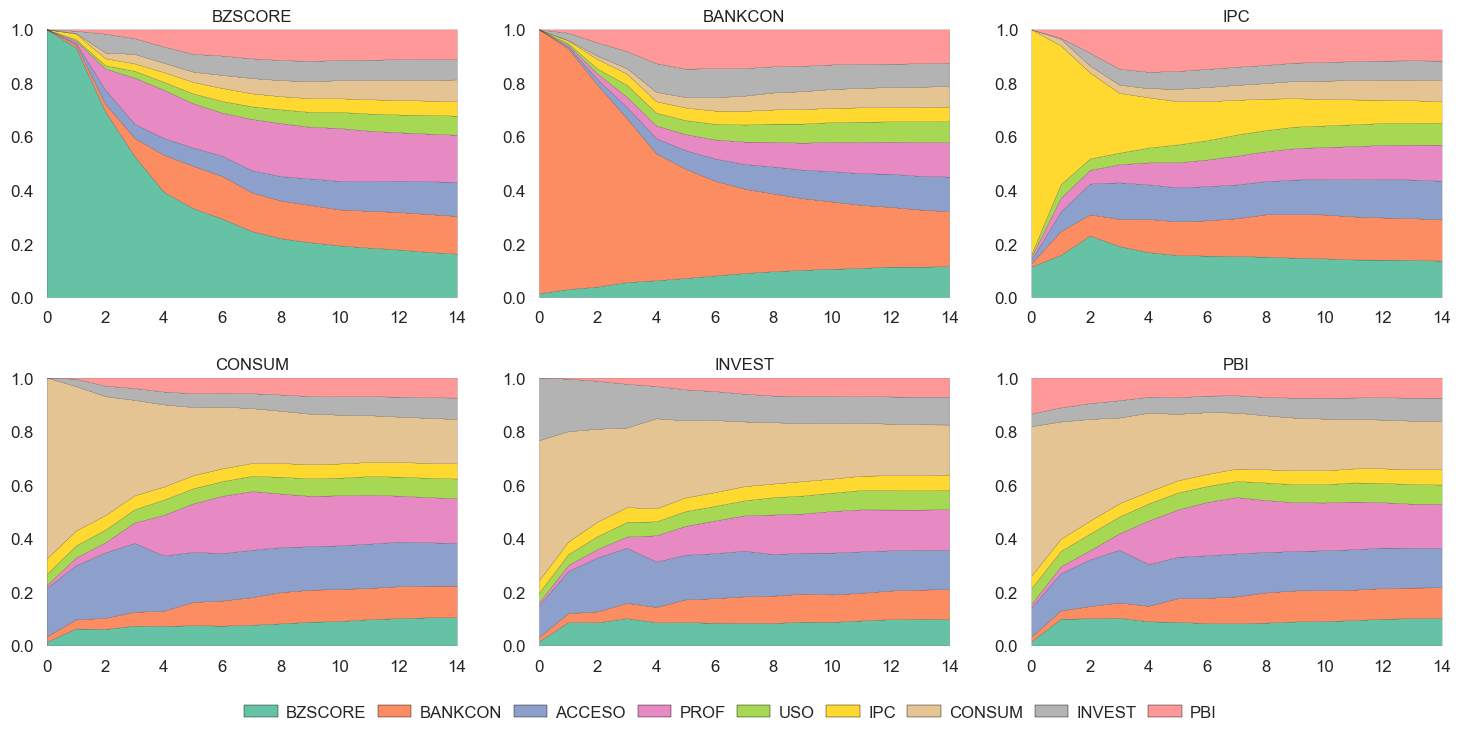

In [47]:
# Preparación de columnas y datos
df.columns = ['Variable_FEVD', 'Variable_Explicativa'] + list(range(15))
variables_objetivo = df['Variable_FEVD'].unique()
colores = sns.color_palette("Set2", n_colors=8) + [(1.0, 0.6, 0.6)]  # 9 colores

# Estilo general
sns.set(style="white", context="notebook", font_scale=1.1)

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
axes = axes.flatten()

for idx, var in enumerate(variables_objetivo):
    ax = axes[idx]
    
    sub_df = df[df['Variable_FEVD'] == var]
    datos = sub_df.iloc[:, 2:].values
    explicativas = sub_df['Variable_Explicativa'].values
    horizontes = np.arange(15)

    datos_df = pd.DataFrame(datos.T, columns=explicativas)
    datos_normalizados = datos_df.div(datos_df.sum(axis=1), axis=0)

    # Acumulado para hacer fill_between
    base = np.zeros(len(horizontes))
    for i, col in enumerate(explicativas):
        top = base + datos_normalizados[col].values
        ax.fill_between(
            horizontes, base, top,
            color=colores[i],
            linewidth=0.1,  # línea divisora muy delgada
            edgecolor='black'
        )
        base = top

    ax.set_xlim(0, 14)
    ax.set_ylim(0, 1)
    ax.set_xticks(range(0, 15, 2))
    ax.set_title(f'{var.split()[0]}', fontsize=12, color='#222222')

    # Quitar bordes del gráfico
    for spine in ax.spines.values():
        spine.set_visible(False)

# Leyenda general
handles = [plt.Rectangle((0,0),1,1, color=colores[i], ec='black', linewidth=0.3) for i in range(len(explicativas))]
fig.legend(
    handles, explicativas,
    loc='lower center',
    ncol=9,
    frameon=False,
    fontsize=12,
    handletextpad=0.5,   # reduce espacio entre color y texto
    columnspacing=0.7    # reduce espacio entre columnas
)

# Ajuste de espaciado
plt.subplots_adjust(hspace=0.3)
plt.show()
